In [146]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Species'],header=None)
iris = iris.dropna()

In [2]:
iris[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
type(iris)

pandas.core.frame.DataFrame

In [15]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                print col1
                print col2
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


Sepal_Length
Sepal_Length
Sepal_Width
Sepal_Width
Petal_Length
Petal_Length
Petal_Width
Petal_Width


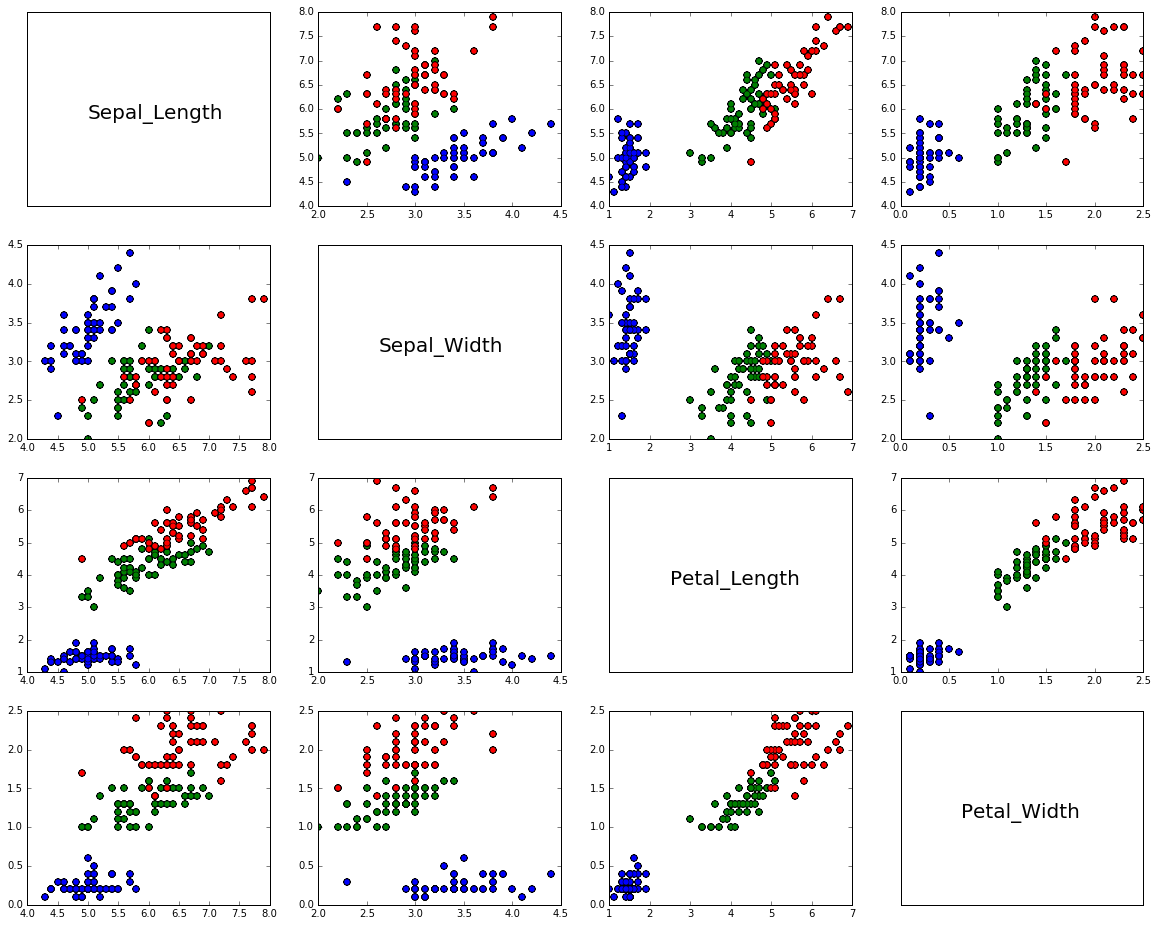

In [16]:
pairs(iris)

In [6]:
 # Divide columns into features and class.
features = list(iris.columns)
classes = features[-1] # create class column
del features[-1] # delete class column from feature vector

In [7]:
features

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [8]:
classes

'Species'

A Plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics:

In [29]:
from sklearn.cross_validation import train_test_split
train, test= train_test_split(iris)

def linear_regression_plot(iris, feature1, feature2):
    # Split the data into training/testing sets

    train_feature1 = train.ix[:, feature1]
    train_feature2 = train.ix[:, feature2]
    test_feature1 = test.ix[:, feature1]
    test_feature2 = test.ix[:, feature2]
    
    
    #call linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(train_feature1,train_feature2)
    
    pl.plot(test_feature1, regr.predict(test_feature1), color='blue',linewidth=3)
    
    for name in iris[classes]:
                    cond = iris[classes] == name
                    pl.plot(test[features[feature1[0]]][cond], test[features[feature2[0]]][cond], linestyle='none', marker='o', label=name)
                
    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(test_feature1) - test_feature2) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(test_feature1, test_feature2))

    # Plot outputs
    plt.xlabel(features[feature1[0]])
    plt.ylabel(features[feature2[0]])
    pl.xticks(())
    pl.yticks(())


    pl.show()

('Coefficients:', array([[-0.00861555]]))
Mean squared error: 0.16
Variance score: -0.00


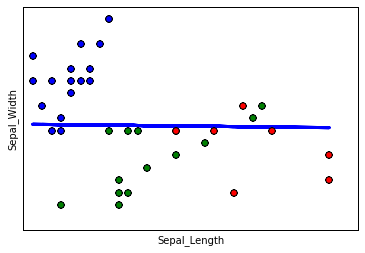

('Coefficients:', array([[ 1.82388648]]))
Mean squared error: 0.70
Variance score: 0.79


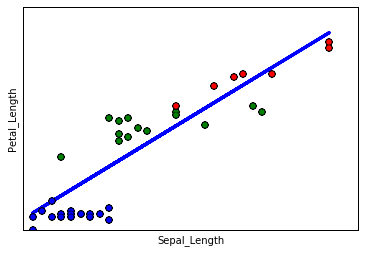

('Coefficients:', array([[ 0.75134887]]))
Mean squared error: 0.14
Variance score: 0.71


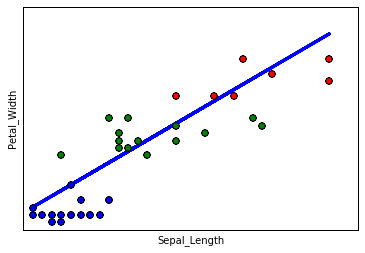

('Coefficients:', array([[-0.02907112]]))
Mean squared error: 0.76
Variance score: -0.06


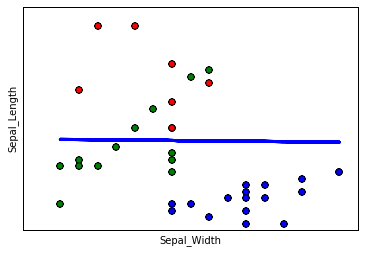

('Coefficients:', array([[-1.33045119]]))
Mean squared error: 2.55
Variance score: 0.22


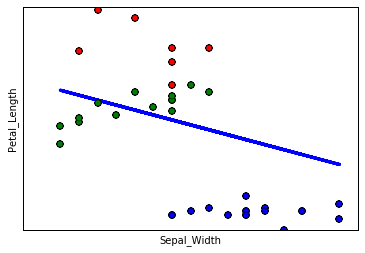

('Coefficients:', array([[-0.50041554]]))
Mean squared error: 0.46
Variance score: 0.06


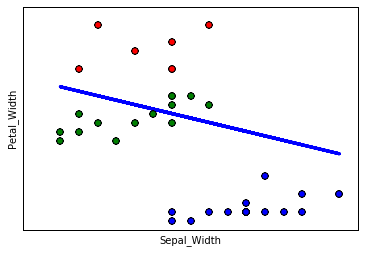

('Coefficients:', array([[ 0.40667866]]))
Mean squared error: 0.15
Variance score: 0.80


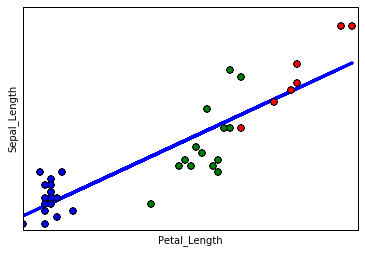

('Coefficients:', array([[-0.08791721]]))
Mean squared error: 0.10
Variance score: 0.36


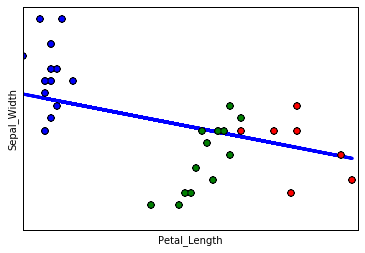

('Coefficients:', array([[ 0.42642527]]))
Mean squared error: 0.04
Variance score: 0.92


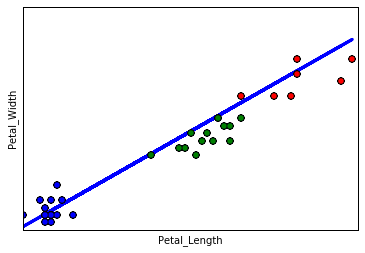

('Coefficients:', array([[ 0.84962497]]))
Mean squared error: 0.19
Variance score: 0.73


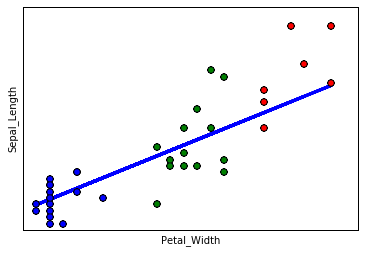

('Coefficients:', array([[-0.16770183]]))
Mean squared error: 0.12
Variance score: 0.25


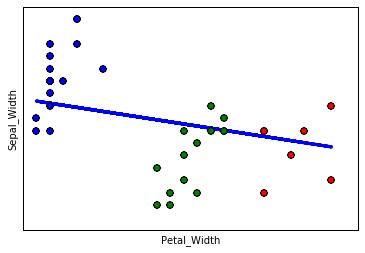

('Coefficients:', array([[ 2.16259393]]))
Mean squared error: 0.23
Variance score: 0.93


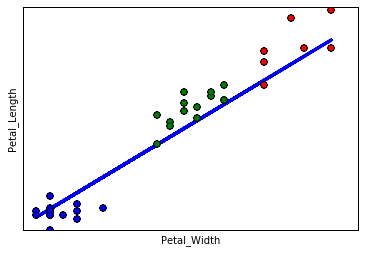

In [32]:
for x in range(4):
    for y in range(4):
     if(x != y):
        linear_regression_plot(iris,(x,), (y,))


The pair of features petal_length and pental Width has the smallest MSE 0.23. 

A plot of the best overall linear regression model you were able to generate using any combination of features(including the use of multiple features used in combination to predict a single feature), with corresponding model statistics. 

In [33]:
from mpl_toolkits.mplot3d import Axes3D

In [34]:
trainSet, testSet= train_test_split(iris)
train_X = trainSet.ix[:, 0:4]
train_Y = trainSet.ix[:,4]
test_X = testSet.ix[:,0:4]
test_Y = testSet.ix[:,4]

In [35]:
train_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
3,4.6,3.1,1.5,0.2
77,6.7,3.0,5.0,1.7
36,5.5,3.5,1.3,0.2
39,5.1,3.4,1.5,0.2
58,6.6,2.9,4.6,1.3


In [36]:
test_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
59,5.2,2.7,3.9,1.4
49,5.0,3.3,1.4,0.2
31,5.4,3.4,1.5,0.4
122,7.7,2.8,6.7,2.0
124,6.7,3.3,5.7,2.1


In [168]:
ols = linear_model.LinearRegression()


In [169]:
import itertools as iter
def allCombination(l,nums):
    return list(iter.permutations(l,nums))

In [177]:
def plot_figs(fig_num, elev, azim, train_X,test_X, clf,combination):
    ols.fit(train_X.ix[:,(combination[0],combination[1])], train_X.ix[:,combination[2]])
    fig = plt.figure(fig_num, figsize=(6, 5))
    plt.clf()
    params = clf.coef_
    a = params[0]
    b = params[1]
    ax = Axes3D(fig, elev=elev, azim=azim)
    x = test_X.ix[:, 0]
    y = test_X.ix[:, 1]
    z = clf.predict(test_X.ix[:,(0,1)])
    #print x
    #print y
    #print z
    # convert to 2d matrices
    X, Y = np.meshgrid(x, y) 
    zs= np.array([fun(x,a,y,b) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    
    ax.scatter(test_X.ix[:, combination[0]], test_X.ix[:, combination[1]], test_X.ix[:, combination[2]], c='k', marker='+')
    ax.plot_surface(X,Y,Z,rstride=1, cstride=1,alpha=0.2,cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
    ax.set_xlabel(features[combination[0]])
    ax.set_ylabel(features[combination[1]])
    ax.set_zlabel(features[combination[2]])
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    
    print('Coefficients:', clf.coef_)
    # The mean squared error
    mse = np.mean((z-test_X.ix[:, 2])**2)
    print("Mean squared error: %.2f"
          % mse)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % clf.score(test_X.ix[:,(0,1)], test_X.ix[:, 2]))
    
    return mse, combination
     
    
def fun(x,a,y,b):
    return x*a + y*b
    

('Coefficients:', array([ 1.73827466, -1.29255285]))
Mean squared error: 0.28
Variance score: 0.91


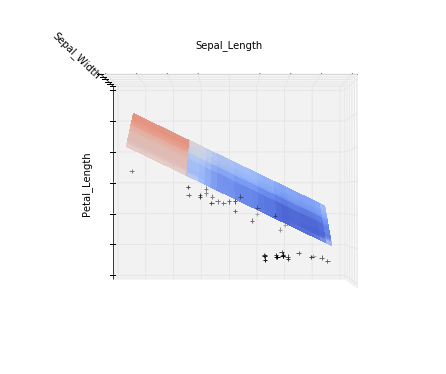

('Coefficients:', array([ 0.71194885, -0.4272835 ]))
Mean squared error: 6.64
Variance score: -1.16


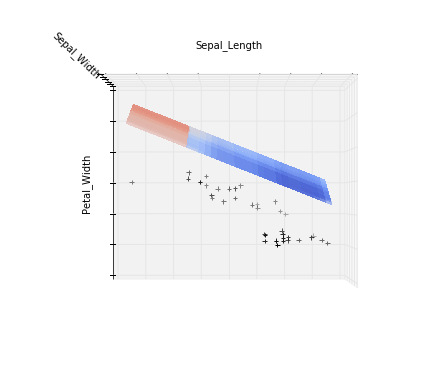

('Coefficients:', array([ 0.5092287 , -0.30651356]))
Mean squared error: 1.85
Variance score: 0.40


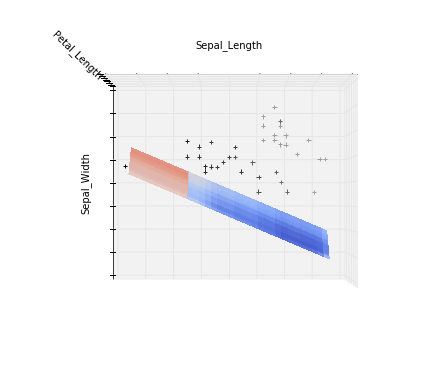

('Coefficients:', array([-0.08552867,  0.45515821]))
Mean squared error: 9.18
Variance score: -1.99


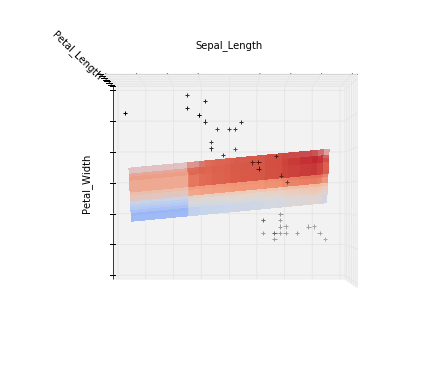

('Coefficients:', array([ 0.23890817, -0.38147276]))
Mean squared error: 3.30
Variance score: -0.08


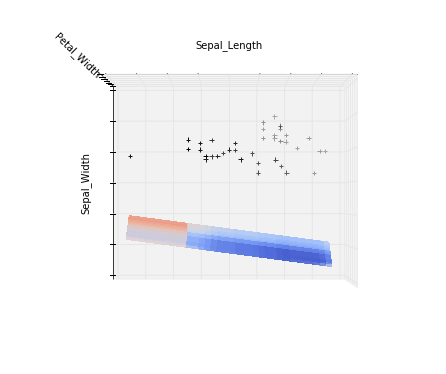

('Coefficients:', array([ 0.54016149,  1.71359582]))
Mean squared error: 17.27
Variance score: -4.63


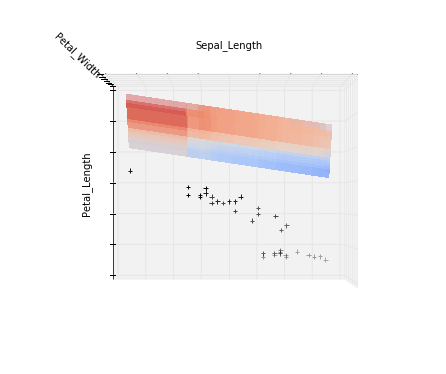

('Coefficients:', array([-1.29255285,  1.73827466]))
Mean squared error: 65.83
Variance score: -20.45


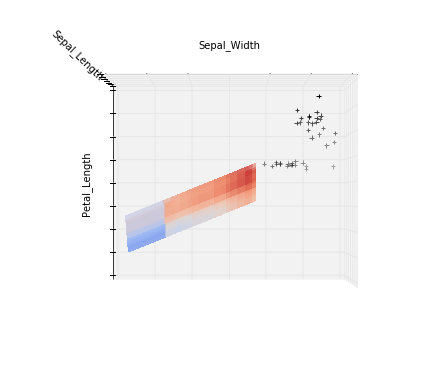

('Coefficients:', array([-0.4272835 ,  0.71194885]))
Mean squared error: 30.87
Variance score: -9.06


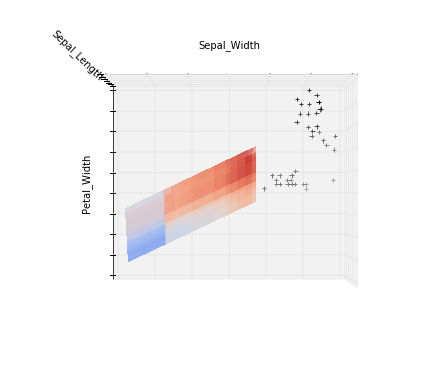

('Coefficients:', array([ 0.58293143,  0.47187219]))
Mean squared error: 16.55
Variance score: -4.39


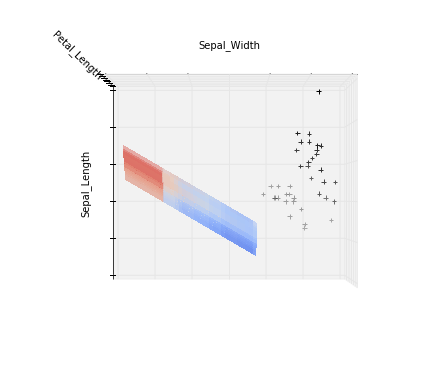

('Coefficients:', array([ 0.13766824,  0.43246066]))
Mean squared error: 7.17
Variance score: -1.34


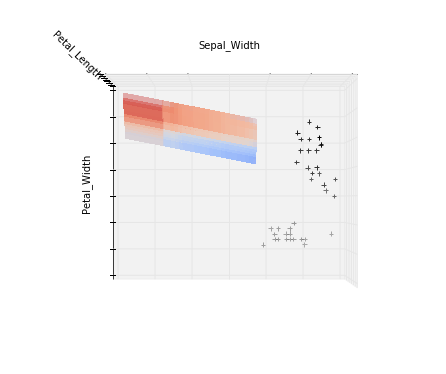

('Coefficients:', array([ 0.35647304,  0.94840075]))
Mean squared error: 31.78
Variance score: -9.35


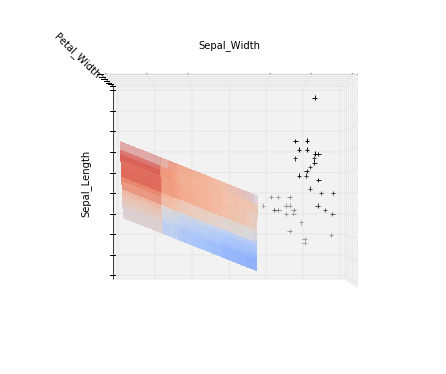

('Coefficients:', array([-0.41991649,  2.12218735]))
Mean squared error: 19.37
Variance score: -5.31


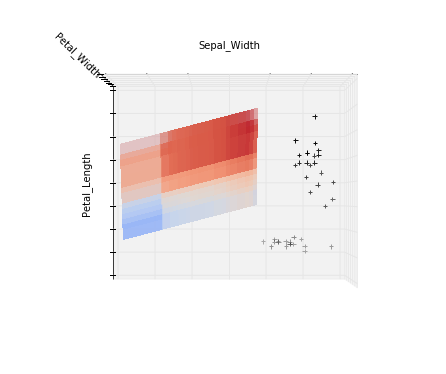

('Coefficients:', array([-0.30651356,  0.5092287 ]))
Mean squared error: 8.97
Variance score: -1.92


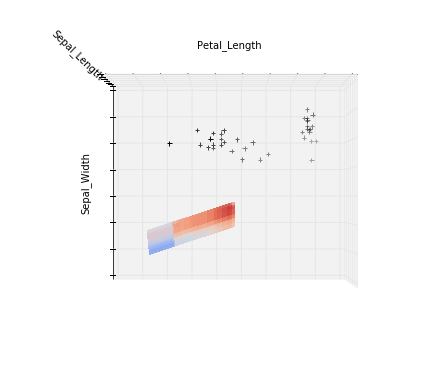

('Coefficients:', array([ 0.45515821, -0.08552867]))
Mean squared error: 3.09
Variance score: -0.01


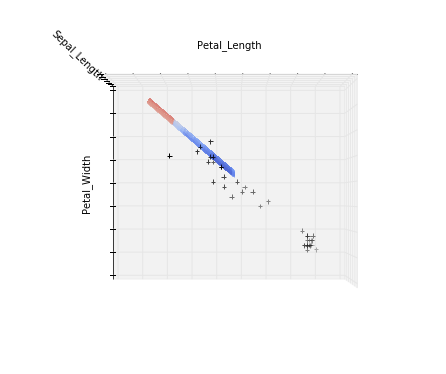

('Coefficients:', array([ 0.47187219,  0.58293143]))
Mean squared error: 14.85
Variance score: -3.84


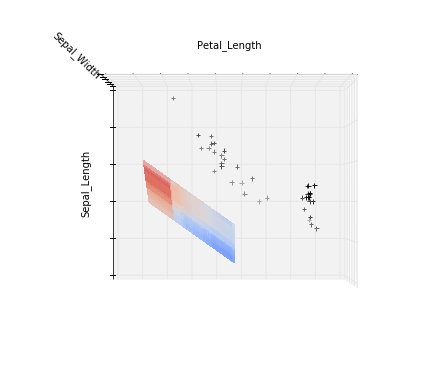

('Coefficients:', array([ 0.43246066,  0.13766824]))
Mean squared error: 3.92
Variance score: -0.28


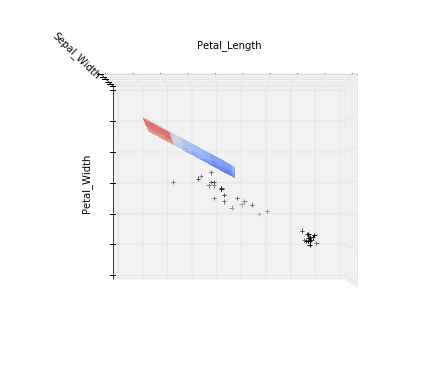

('Coefficients:', array([ 0.55601437, -0.33145159]))
Mean squared error: 10.64
Variance score: -2.47


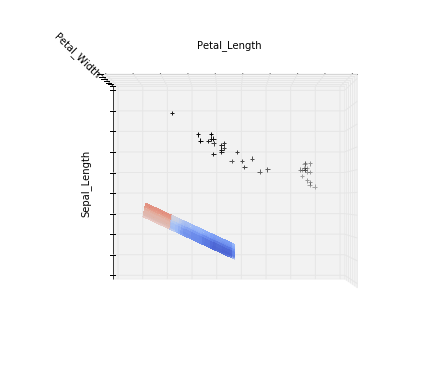

('Coefficients:', array([-0.28968742,  0.46605542]))
Mean squared error: 4.24
Variance score: -0.38


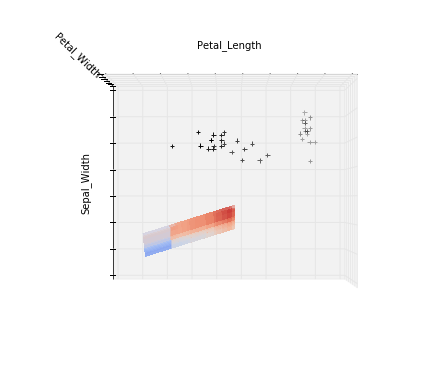

('Coefficients:', array([-0.38147276,  0.23890817]))
Mean squared error: 10.71
Variance score: -2.49


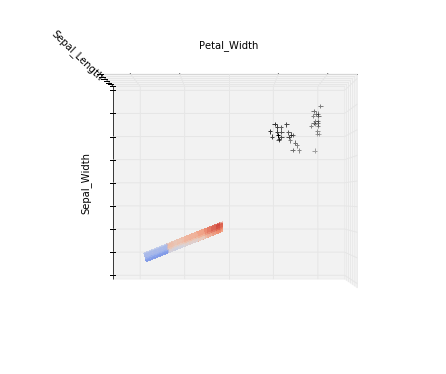

('Coefficients:', array([ 1.71359582,  0.54016149]))
Mean squared error: 44.29
Variance score: -13.43


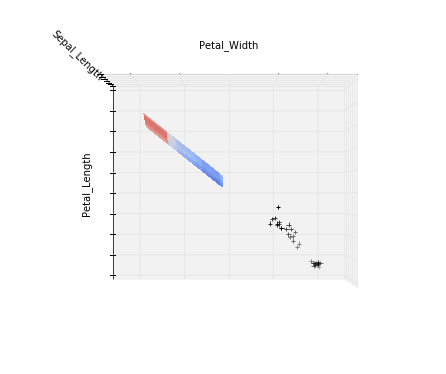

('Coefficients:', array([ 0.94840075,  0.35647304]))
Mean squared error: 48.03
Variance score: -14.65


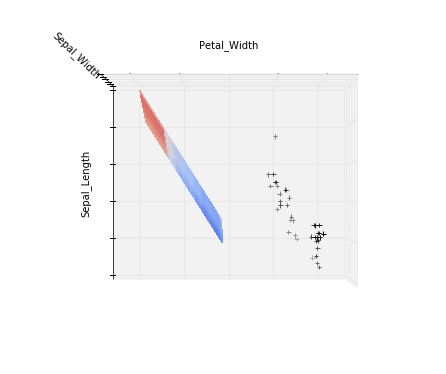

('Coefficients:', array([ 2.12218735, -0.41991649]))
Mean squared error: 97.23
Variance score: -30.68


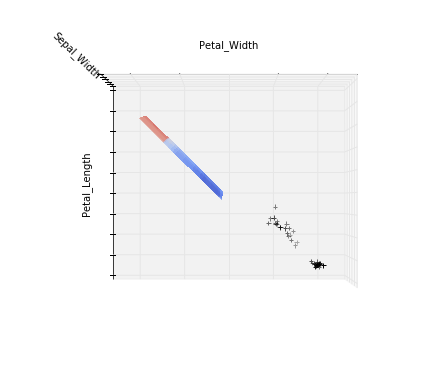

('Coefficients:', array([-0.33145159,  0.55601437]))
Mean squared error: 5.03
Variance score: -0.64


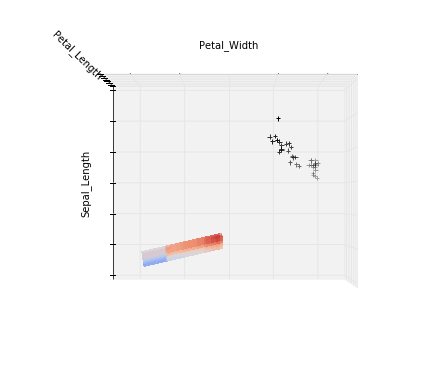

('Coefficients:', array([ 0.46605542, -0.28968742]))
Mean squared error: 6.08
Variance score: -0.98


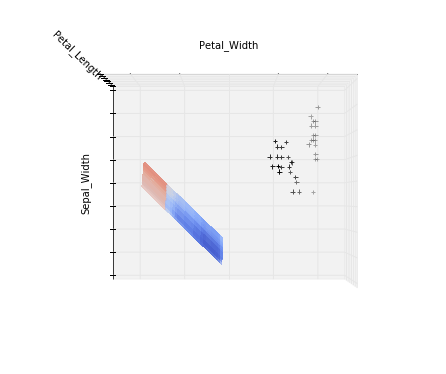

smallest MSE in three features combination: 0.28
(' three features: ', (0, 1, 2))
('feature1: ', 'Sepal_Length')
('feature2: ', 'Sepal_Width')
('feature3: ', 'Petal_Length')


In [180]:
allCom =  allCombination([0,1,2,3], 3)

finalMSE = float("inf")
finalCombination = None
for com in allCom:
    #Generate the three different figures from different views
    elev = -.5
    azim = 90
    mse,combination = plot_figs(1, elev, azim, train_X,test_X, ols,com)
    if(mse < finalMSE):
        finalMSE = mse
        finalCombination = combination
    plt.show()

    
print ("smallest MSE in three features combination: %.2f" % finalMSE)
print (" three features: ", finalCombination )
print ("feature1: ", features[finalCombination[0]])
print ("feature2: ", features[finalCombination[1]])
print ("feature3: ", features[finalCombination[2]])

It shows that using two features 'Sepal_Length' and 'Sepal_Width' to predict 'Petal_length' gives us 0.28 MSE, however
the pair of features petal_length and pental Width has the smallest MSE 0.23. 